# 🏷️ Part 2.1 – Explore Most Common Words in Job Postings

**Author:** Yu Kyung Koh  
**Last Updated:** July 12, 2025  

---

### 🎯 Objective

* This notebook conducts an exploratory analysis of the most common words in job postings, categorized by job sector. 
* This step serves as a foundation before applying more systematic methods to extract job skills and tasks in the subsequent notebooks. 
  
### 🗂️ Outline
* **Section 1:** Prepare and preprocess the job posting data  
* **Section 2:** Check the most common words in job descriptions

---
## SECTION 1: Prepare and preprocess the job posting data 

In [3]:
import pandas as pd
import numpy  as np
import os
from symspellpy import SymSpell, Verbosity
from collections import Counter
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordTokenizer

import matplotlib.pyplot as plt
%matplotlib inline
from textblob import Word

In [4]:
# --------------------------------------
# STEP 1: Import data and clean
# --------------------------------------
datadir = '../data/'
jobposting_file = os.path.join(datadir, 'synthetic_job_postings_combined.csv')

posting_df = pd.read_csv(jobposting_file)

posting_df.head() 

job_title  \
0  Educational Program Coordinator   
1          Healthcare Data Analyst   
2  Strategic Operations Consultant   
3  Financial Operations Specialist   
4           Marketing Data Analyst   

                                        posting_text      sector  
0  We are seeking an enthusiastic Educational Pro...   education  
1  We are seeking a detail-oriented Healthcare Da...  healthcare  
2  **Location:** Hybrid (New York, NY)  \n**Salar...  consulting  
3  **Location:** Hybrid (New York City, NY)  \n**...     finance  
4  We are seeking a detail-oriented Marketing Dat...   marketing

In [5]:
# --------------------------------------
# STEP 2: Lowercase, tokenize, and POS-tag
# --------------------------------------
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger_eng', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

# Initialize tokenizer and stopwords
tokenizer = TreebankWordTokenizer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Add custom stopwords
custom_stopwords = {"please", "required", "make", "look"}  # Add any custom terms that are not informative about underlying topics
stop_words.update(custom_stopwords)

# Helper: convert NLTK POS tag to WordNet POS tag (Necessary to perform accurate lemmatization using WordNetLemmatizer)
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default fallback

# Define the full preprocessing function
def preprocess(text):
     # Step 1: Lowercase and tokenize
    tokens = tokenizer.tokenize(text.lower())

    # Step 2: Remove non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha()]

    # Step 3: POS tagging
    tagged = nltk.pos_tag(tokens)

    # Step 4: Lemmatize (keep nouns and verbs)
    lemmatized = [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos))
        for word, pos in tagged
        if pos.startswith('NN') or pos.startswith('VB')
    ]

    # Step 5: Remove stopwords after lemmatization
    lemmatized = [word for word in lemmatized if word not in stop_words]

    return lemmatized

# Apply preprocessing to all job postings
tokenized_docs = posting_df['posting_text'].fillna('').apply(preprocess)

---
## SECTION 2: Check the most common words in job descriptions

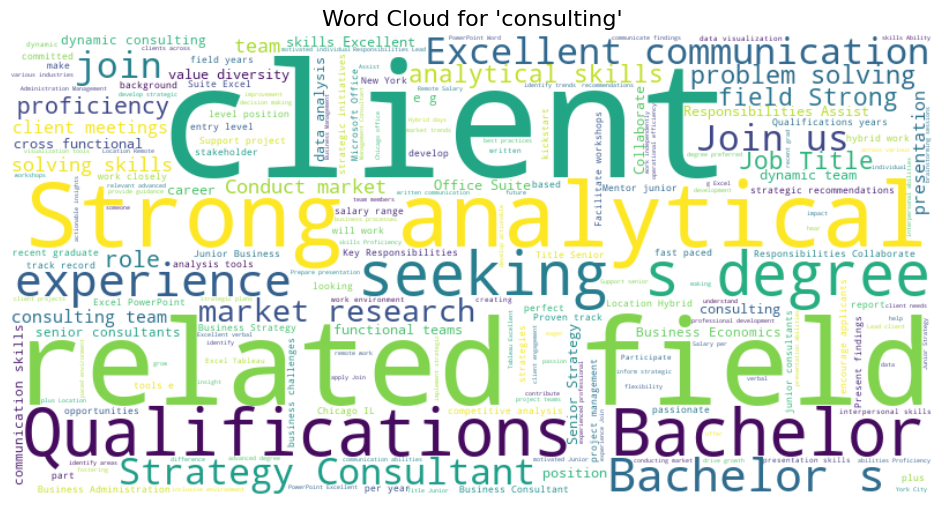

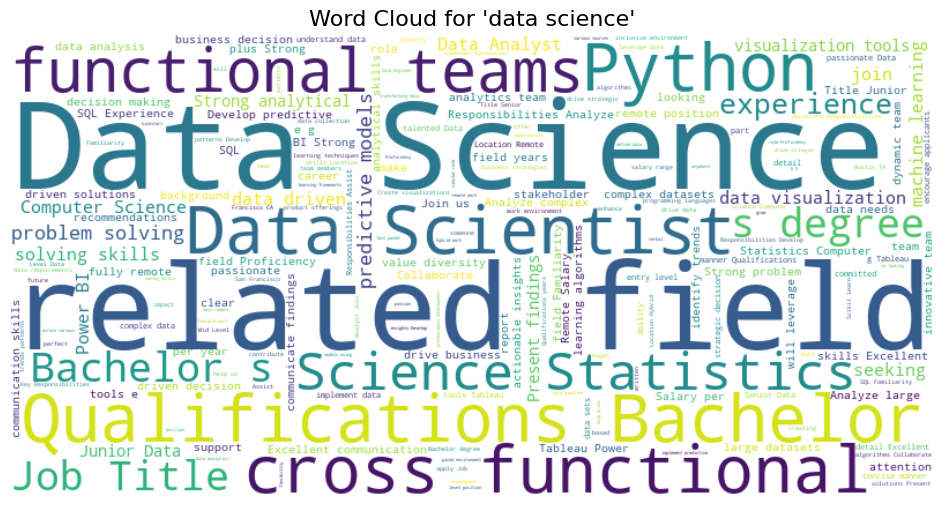

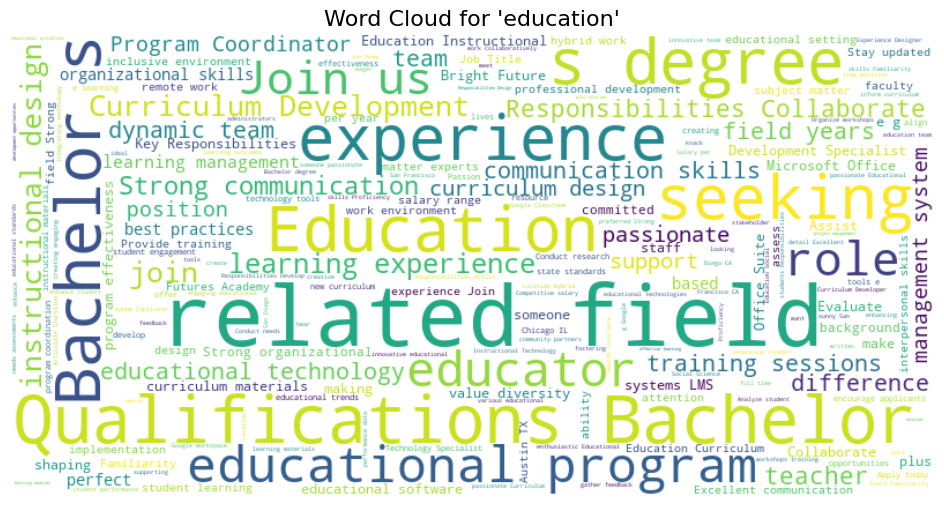

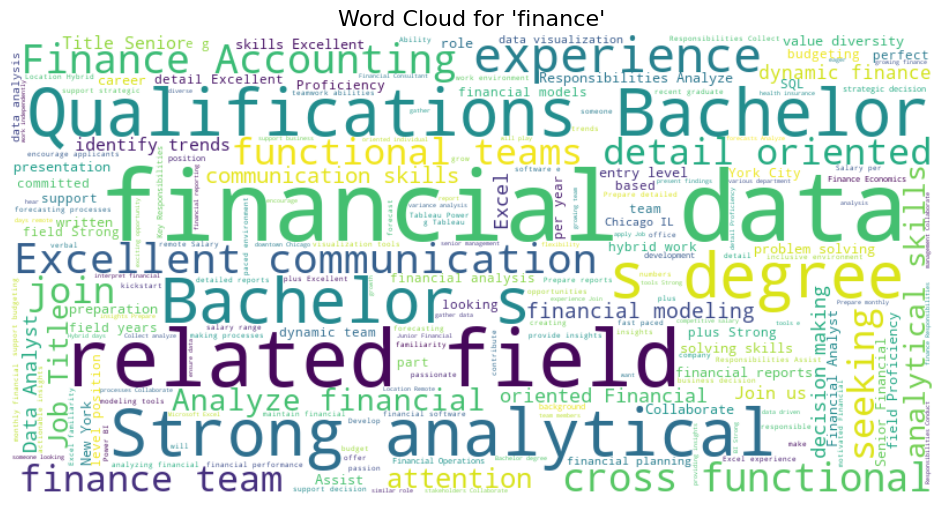

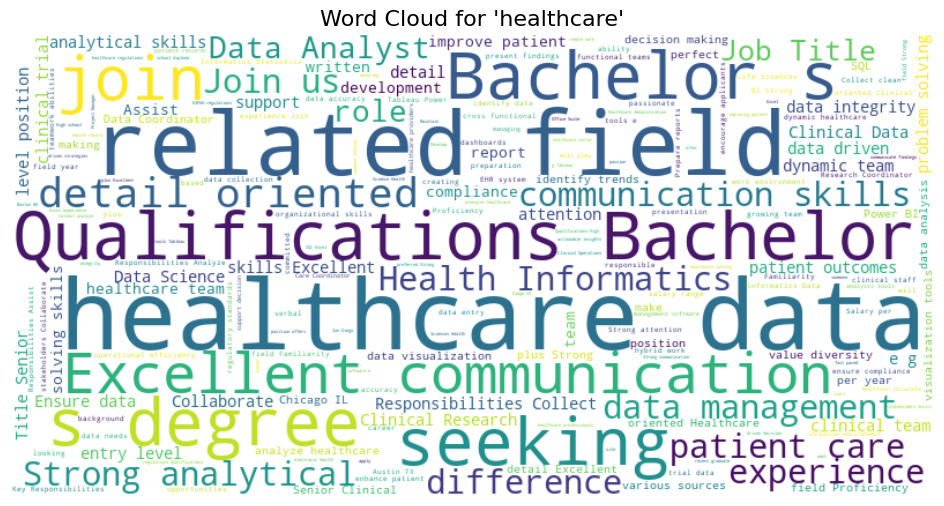

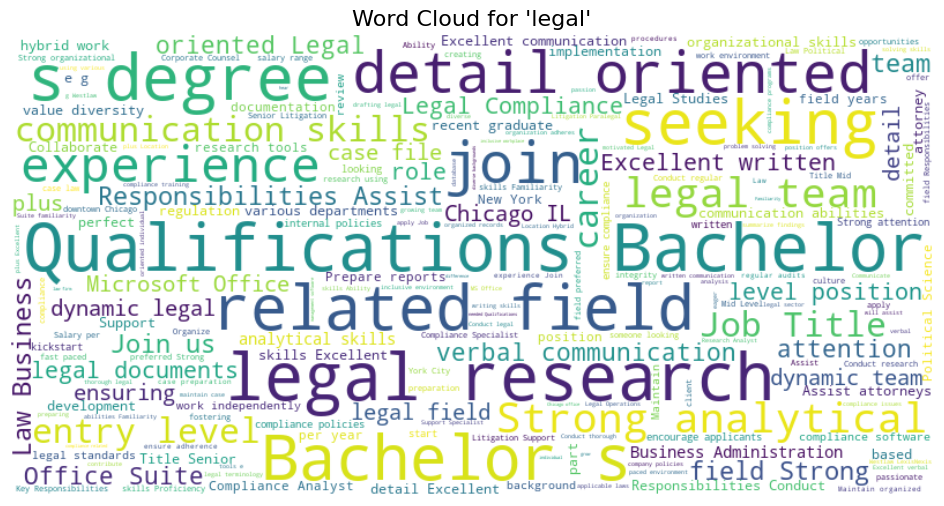

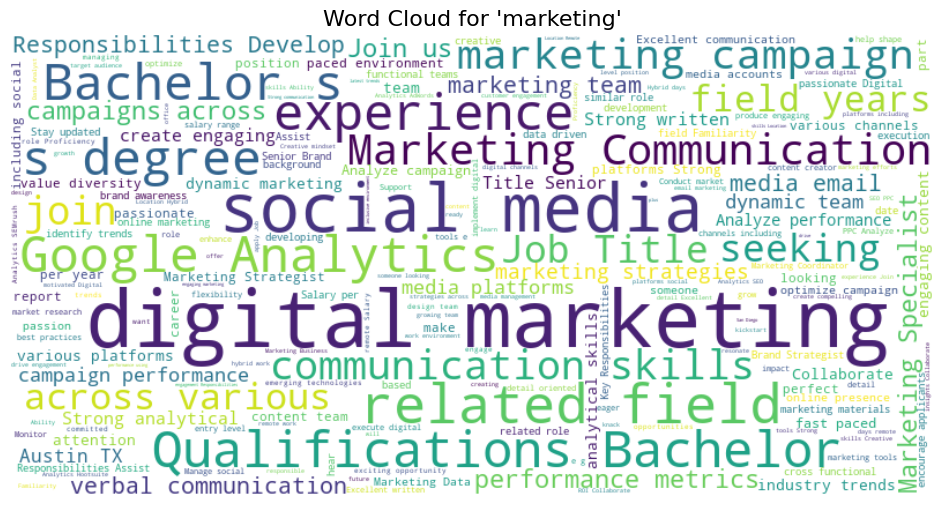

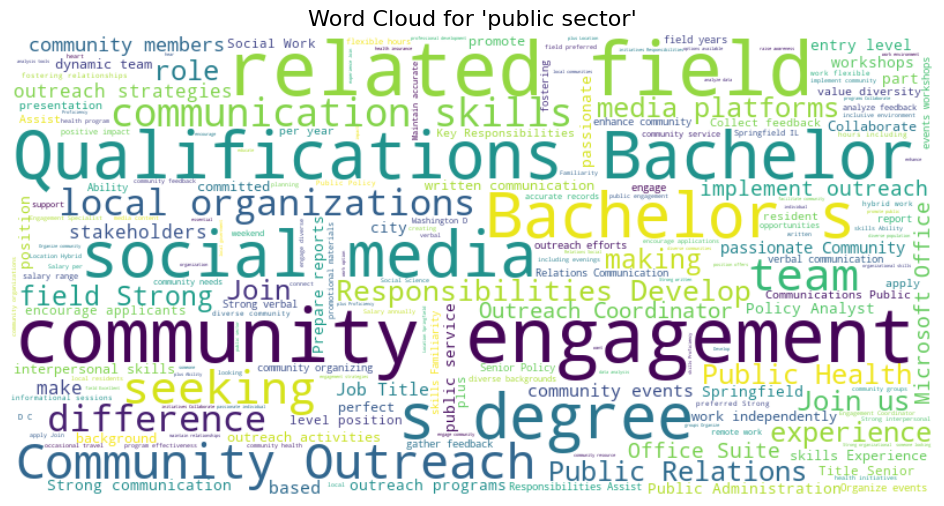

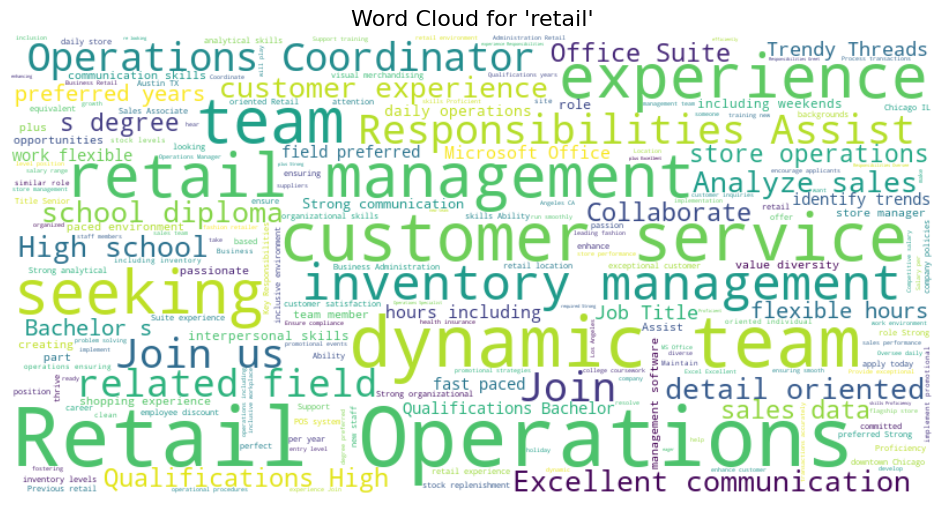

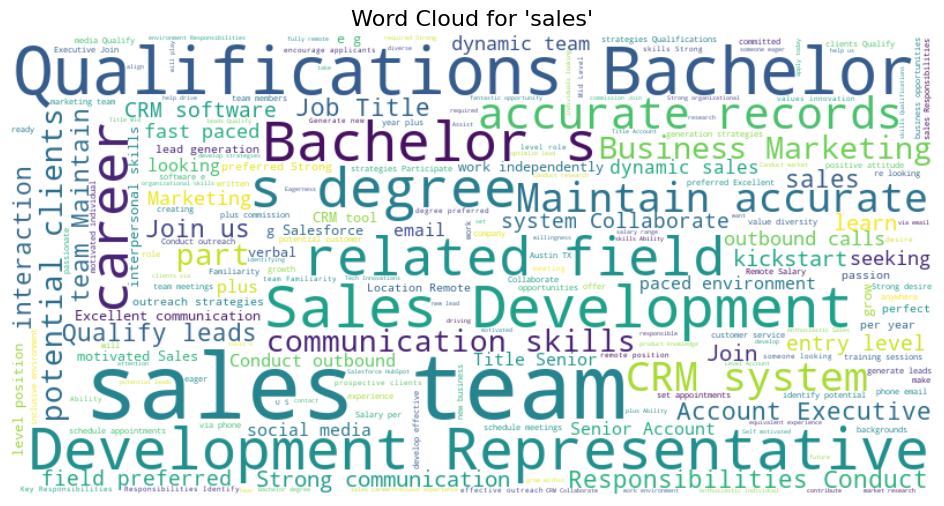

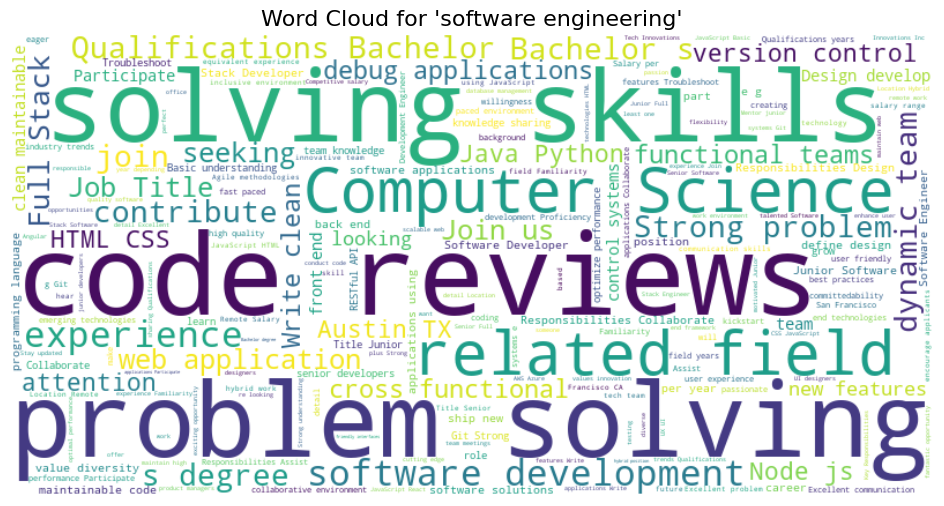

In [7]:
# Group by job category and concatenate descriptions
grouped_texts = posting_df.groupby('sector')['posting_text'].apply(lambda x: ' '.join(x.dropna()))

# Loop through each category and create word clouds
for category, text in grouped_texts.items():
    if not text.strip():  # skip empty strings
        continue

    # Create and configure WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

    # Plot the WordCloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for '{category}'", fontsize=16)
    plt.show()

### 🔷 Comments on the word clouds: 

- Word clouds of the most frequently appearing terms offer useful insights into job postings.
- However, many common terms are uninformative (e.g., "join us", "related field").
- In the following notebooks, I apply more systematic methods to extract job skills and tasks from job descriptions.